# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [1]:
### odtud už je to Vaše



# ŘEŠENÍ

## I. Předzpracování dat

Importuju potřebné knihovny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Načítam si dataset ze csv-souboru a podívám se na informace o něm

In [3]:
df = pd.read_csv('train.csv')
display(df.shape)
display(df.head())
display(df.info())
display(df.nunique())
display(df.describe())

(2400, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


None

label        2
pixel1       1
pixel2       1
pixel3       1
pixel4       3
            ..
pixel780    22
pixel781     9
pixel782     3
pixel783     2
pixel784     1
Length: 785, dtype: int64

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


In [4]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
df.isnull().sum(axis=0)

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Jak my můžeme vidět náš dataset neobsahuje žádná nullová data. Proto můžu klidně pracovat s daty dále.

Zobrazím několik prvních obrázků z našeho datasetu 

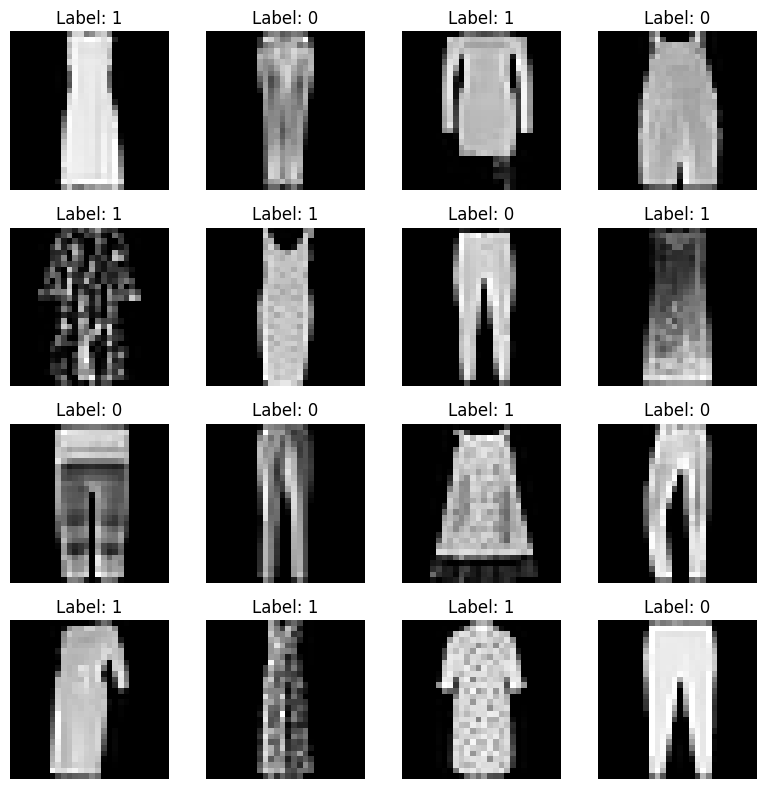

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
axs = axs.flatten()

for image_index, ax in enumerate(axs):
    image_pixels = df.iloc[image_index, 1:].values
    # Reshape the pixel values into a 28x28 image
    image = image_pixels.reshape(28, 28)
    label_image = df['label'][image_index]
    
    ax.imshow(image, cmap='gray', extent=[0, 1, 0, 1])
    ax.set_title(f"Label: {label_image}")
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## II. Použítí modelů machine learningu

### II(a). Rozdělení dat

Nejperve, rozdělím si dataset na cílovou proměnnou (v našem případě to je 'Label'), kterou chci predikovat, a na matici pixelů, pomocí kterou budu predikovat.

In [7]:
from sklearn.model_selection import train_test_split

Xdata = df.drop('label', axis=1)
ydata = df['label']

Ted' už rozdělím data na trénovací a testovací množiny v poměru 60:40.

In [8]:
rd_seed = 100

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1440, 784)

(1440,)

(960, 784)

(960,)

Rozdělím testovací množinu na validační a testovací.

In [9]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(480, 784)

(480,)

(480, 784)

(480,)

Vytvořím slovník pro naše modely a metody předzpracovávní dat

In [10]:
accuracy = {
    'SVM': [],
    'GaussianNB': [],
    'BernoulliNB': [],
    'LDA': []
}

row_names = ['Original', 'Standard', 'MinMax', 'PCA', 'LLE']

Applikuju metody standardizace a normalizace dat

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_standard = StandardScaler()
Xtrain_standard = scaler_standard.fit_transform(Xtrain)
Xval_standard = scaler_standard.transform(Xval)


scaler_min_max = MinMaxScaler()
Xtrain_min_max = scaler_min_max.fit_transform(Xtrain)
Xval_min_max = scaler_min_max.transform(Xval)

### II(b). Implementace a použití modelů Support Vector Machine

Použiju model Support Vector Classifier a udělám ladění hyperparametrů postupně pro původní, standardizovaná a normalizovaná data

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

param_comb = ParameterGrid(param_grid)

val_metric = []
val_metric_standard = []
val_metric_min_max = []

for params in param_comb:
    clf = SVC(**params).fit(Xtrain, ytrain)
    val_metric.append(metrics.accuracy_score(yval, clf.predict(Xval)))

    clf_stand = SVC(**params).fit(Xtrain_standard, ytrain)
    val_metric_standard.append(metrics.accuracy_score(yval, clf_stand.predict(Xval_standard)))

    clf_norm = SVC(**params).fit(Xtrain_min_max, ytrain)
    val_metric_min_max.append(metrics.accuracy_score(yval, clf_norm.predict(Xval_min_max)))

Hledám pro SVC applikované na původní nezpracovaná data nejlepší parametry a nejvyšší dosaženou přesnost 

In [13]:
best_params_SVC = param_comb[np.argmax(val_metric)]

print(f"The best params for Support Vector Classifier: {best_params_SVC}")
print(f'The best accuracy score for Support Vector Classifiert: {max(val_metric):.4f}')

accuracy['SVM'].append(round(max(val_metric),6))

The best params for Support Vector Classifier: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
The best accuracy score for Support Vector Classifiert: 0.9708


Hledám pro SVC applikované na standardizovná data nejlepší parametry a nejvyšší dosaženou přesnost 

In [14]:
best_params_SVC_standard = param_comb[np.argmax(val_metric_standard)]

print(f"The best params for Support Vector Classifier Standard: {best_params_SVC_standard}")
print(f'The best accuracy score for Support Vector Classifier Standard: {max(val_metric_standard):.4f}')

accuracy['SVM'].append(round(max(val_metric_standard),6))

The best params for Support Vector Classifier Standard: {'kernel': 'poly', 'gamma': 'auto', 'C': 100}
The best accuracy score for Support Vector Classifier Standard: 0.9729


Hledám pro SVC applikované na normalizovaná pomocí metody MinMax data nejlepší parametry a nejvyšší dosaženou přesnost 

In [15]:
best_params_SVC_min_max = param_comb[np.argmax(val_metric_min_max)]

print(f"The best params for Support Vector Classifier MinMax: {best_params_SVC_min_max}")
print(f'The best accuracy score for Support Vector Classifier MinMax: {max(val_metric_min_max):.4f}')

accuracy['SVM'].append(round(max(val_metric_min_max),6))

The best params for Support Vector Classifier MinMax: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
The best accuracy score for Support Vector Classifier MinMax: 0.9708


Vidím, že při použití metody standardizace jsem dostal nejvyšší přesnost 

### II(с). Implementace a použití modelů naivního Bayesova klasifikátoru

#### 1) Gaussian Naive Bayes

Použiju model Gaussian Naive Bayes postupně pro původní, standardizovaná a normalizovaná data. U Gaussian Naive Bayes nemáme žádné hyperparametry k ladění.

In [16]:
from sklearn.naive_bayes import GaussianNB

clf_GaussNB = GaussianNB();
clf_GaussNB.fit(Xtrain, ytrain);
ypred = clf_GaussNB.predict(Xval)
print(f"Z {Xval.shape[0]} bodů v Xval je špatně klasifikovaných: {(yval != ypred).sum()}")

print(f"Training accuracy of Gaussian Naive Bayes: {metrics.accuracy_score(ytrain, clf_GaussNB.predict(Xtrain))}")
print(f"Validation accuracy of Gaussian Naive Bayes: {metrics.accuracy_score(yval, clf_GaussNB.predict(Xval))}")

accuracy['GaussianNB'].append(round(metrics.accuracy_score(yval, clf_GaussNB.predict(Xval)),6))

Z 480 bodů v Xval je špatně klasifikovaných: 38
Training accuracy of Gaussian Naive Bayes: 0.9368055555555556
Validation accuracy of Gaussian Naive Bayes: 0.9208333333333333


In [17]:
clf_GaussNB_standard = GaussianNB();
clf_GaussNB_standard.fit(Xtrain_standard, ytrain);
ypred = clf_GaussNB_standard.predict(Xval_standard)
print(f"Z {Xval_standard.shape[0]} bodů v Xval je špatně klasifikovaných: {(yval != ypred).sum()}")

print(f"Trainig accuracy of Gaussian Naive Bayes Standard: {metrics.accuracy_score(ytrain, clf_GaussNB_standard.predict(Xtrain_standard))}")
print(f"Validation accuracy of Gaussian Naive Bayes Standard: {metrics.accuracy_score(yval, clf_GaussNB_standard.predict(Xval_standard))}")

accuracy['GaussianNB'].append(round(metrics.accuracy_score(yval, clf_GaussNB_standard.predict(Xval_standard)),6))

Z 480 bodů v Xval je špatně klasifikovaných: 34
Trainig accuracy of Gaussian Naive Bayes Standard: 0.9402777777777778
Validation accuracy of Gaussian Naive Bayes Standard: 0.9291666666666667


In [18]:
clf_GaussNB_min_max = GaussianNB();
clf_GaussNB_min_max.fit(Xtrain_min_max, ytrain);
ypred = clf_GaussNB_min_max.predict(Xval_min_max)
print(f"Z {Xval_min_max.shape[0]} bodů v Xval je špatně klasifikovaných: {(yval != ypred).sum()}")

print(f"Trainig accuracy of Gaussian Naive Bayes MinMax: {metrics.accuracy_score(ytrain, clf_GaussNB_min_max.predict(Xtrain_min_max))}")
print(f"Validation accuracy of Gaussian Naive Bayes MinMax: {metrics.accuracy_score(yval, clf_GaussNB_min_max.predict(Xval_min_max))}")

accuracy['GaussianNB'].append(round(metrics.accuracy_score(yval, clf_GaussNB_min_max.predict(Xval_min_max)),6))

Z 480 bodů v Xval je špatně klasifikovaných: 35
Trainig accuracy of Gaussian Naive Bayes MinMax: 0.9381944444444444
Validation accuracy of Gaussian Naive Bayes MinMax: 0.9270833333333334


Vidím, že při použití metody standardizace jsem dostal nejvyšší přesnost pro Gaussian Naive Bayes

#### 2) Bernoulli Naive Bayes

Použiju model Bernoulli Naive Bayes. U bernoulli Naive Bayes nemáme žádné hyperparametry k ladění. Ale před applikací modelu Bernoulli Naive Bayes musím binarizovat naše data, protože tento model je applikovat pouze na binární data.

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

val_metric_bnb = {}

for threshold in range(0,255):
    binarizer = Binarizer(threshold=threshold)  # binarization by threshold
    Xtrain_binar = binarizer.fit_transform(Xtrain)
    Xval_binar = binarizer.transform(Xval)
    
    clf_Bernoulli_NB = BernoulliNB();
    clf_Bernoulli_NB.fit(Xtrain_binar, ytrain);
    score = metrics.accuracy_score(yval, clf_Bernoulli_NB.predict(Xval_binar))

    val_metric_bnb[threshold] = score

In [20]:
best_threshold_bnb = 0
best_accuracy_bnb = 0 

for threshold, score in val_metric_bnb.items():
    if score > best_accuracy_bnb:
        best_accuracy_bnb = score
        best_threshold_bnb = threshold

print("Best threshold for Bernoulli Naive Bayes: ", best_threshold_bnb)
print("Best accuracy of Bernoulli Naive Bayes: ", best_accuracy_bnb)

accuracy['BernoulliNB'].append(round(best_accuracy_bnb,6))

for _ in range(4):
    accuracy['BernoulliNB'].append(np.NaN)

Best threshold for Bernoulli Naive Bayes:  21
Best accuracy of Bernoulli Naive Bayes:  0.9666666666666667


Vidím, že na původních datech jsem dostal vysokou přesnost pro Bernoulli Naive Bayes

Nemůžeme aplikovat model Bernoulli Naive Bayes na datech předzpracovaných pomocí standardizace, MinMax normalizace, PCA a LLE, protože to všechno je metody pro spojité data, ale binární data potřebné pro tento model jsou diskrétní.

### II(d). Implementace a použití modelů Linear Discriminant Analysis

Ted natrénuju modely Linear Discriminant Analysis postupně na původních, standardizaovaných a normalizovaných datech jednotlivě.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis().fit(Xtrain, ytrain)
accuracy_score = metrics.accuracy_score(yval, clf.predict(Xval))
print(f"Accuracy of Linear Discriminant Analysis: {accuracy_score}")
accuracy['LDA'].append(round(accuracy_score,6))

clf_stand = LinearDiscriminantAnalysis().fit(Xtrain_standard, ytrain)
accuracy_score = metrics.accuracy_score(yval, clf_stand.predict(Xval_standard))
print(f"Accuracy of Linear Discriminant Analysis Standard: {accuracy_score}")
accuracy['LDA'].append(round(accuracy_score,6))

clf_normal = LinearDiscriminantAnalysis().fit(Xtrain_min_max, ytrain)
accuracy_score = metrics.accuracy_score(yval, clf_normal.predict(Xval_min_max))
print(f"Accuracy of Linear Discriminant Analysis MinMax: {accuracy_score}")
accuracy['LDA'].append(round(accuracy_score,6))

Accuracy of Linear Discriminant Analysis: 0.91875
Accuracy of Linear Discriminant Analysis Standard: 0.91875
Accuracy of Linear Discriminant Analysis MinMax: 0.91875


Vidím, že jsem nedostal žádné změny přesnosti při aplikaci modelů Linear Discriminant Analysis na originálních a předzpracovaných datech

### II(e). Aplikace metody Principal Component Analysis 

#### 1) Support Vector Machine

Před použitím modelů Support Vector Machine nastavím limitu na maximální počet iterací na 300000 a zfiltruju varování o konvergenci modelů, protože SVM modely s lineárním kernelem nekonvergujou vždy

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

Rozhodl jsem nastavit maximální počet dimenzí pro naše data na 80, protože pro vyšší počet modely nedává lepší výsledky

In [23]:
from sklearn.decomposition import PCA

svc_pca = {}

pca = PCA()
pca.fit(Xtrain)                                    
Xtrain_pca = pca.fit_transform(Xtrain)
Xval_pca = pca.transform(Xval)

for n in range(1, 81):
    Xsub_train = Xtrain_pca[:,0:n]
    Xsub_val = Xval_pca[:,0:n]
        
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000, 10000],  # Regularization parameter
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
        'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel,
        'max_iter': [30000]
    }
        
    param_comb = ParameterGrid(param_grid)
        
    val_metric = []
        
    for params in param_comb:
        clf = SVC(**params).fit(Xsub_train, ytrain)
        val_metric.append(metrics.accuracy_score(yval, clf.predict(Xsub_val)))

    svc_pca[n] = val_metric

Hledám pro SVC applikované na předzpracováná pomocí PCA data nejlepší parametry a komponenty a nejvyšší dosaženou přesnost

In [24]:
best_accuracy_pca_svm = 0
best_params_pca_svm = None
best_component_pca_svm = 0

for n, val_metric in svc_pca.items():
    max_val_metric_index = np.argmax(val_metric)
    if val_metric[max_val_metric_index] > best_accuracy_pca_svm:
        best_accuracy_pca_svm = val_metric[max_val_metric_index]
        best_params_pca_svm = list(ParameterGrid(param_grid))[max_val_metric_index]
        best_component_pca_svm = n

print("Best parameters for Support Vector Machine with PCA:", best_params_pca_svm, best_component_pca_svm)
print("Best accuracy of Support Vector Machine with PCA:", best_accuracy_pca_svm)

accuracy['SVM'].append(round(best_accuracy_pca_svm,6))

Best parameters for Support Vector Machine with PCA: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 30000} 18
Best accuracy of Support Vector Machine with PCA: 0.9854166666666667


#### 2) Gaussian Naive Bayes

Udělám to samé i pro modely Gaussian Naive Bayes, ale bez ladění hyperparametrů.

In [25]:
gnb_pca = {}

pca = PCA()
pca.fit(Xtrain)                                    
Xtrain_pca = pca.fit_transform(Xtrain)
Xval_pca = pca.transform(Xval)

for n in range(1, 81):
    Xsub_train = Xtrain_pca[:,0:n]
    Xsub_val = Xval_pca[:,0:n]
        
    clf_GaussNB = GaussianNB();
    clf_GaussNB.fit(Xsub_train, ytrain);
    
    score = metrics.accuracy_score(yval, clf_GaussNB.predict(Xsub_val))

    gnb_pca[n] = score

Hledám pro GNB applikované na předzpracováná pomocí PCA data nejlepší komponenty a nejvyšší dosaženou přesnost

In [26]:
best_accuracy_pca_gnb = 0
best_component_pca_gnb = 0

for n, score in gnb_pca.items():
    if score > best_accuracy_pca_gnb:
        best_accuracy_pca_gnb = score
        best_component_pca_gnb = n

print("Best parameters for Gaussian Naive Bayes with PCA:", best_component_pca_gnb)
print("Best accuracy of Gaussian Naive Bayes with PCA:", best_accuracy_pca_gnb)

accuracy['GaussianNB'].append(round(best_accuracy_pca_gnb,6))

Best parameters for Gaussian Naive Bayes with PCA: 3
Best accuracy of Gaussian Naive Bayes with PCA: 0.9395833333333333


#### 3) Linear Discriminant Analysis

Zkusím modely Linear Disrcriminant Analysis s použitím metody Principal Components Analysis

In [27]:
lda_pca = {}

pca = PCA()
pca.fit(Xtrain_binar)                                    
Xtrain_pca = pca.fit_transform(Xtrain_binar)
Xval_pca = pca.transform(Xval_binar)

for n in range(1, 81):
    Xsub_train = Xtrain_pca[:,0:n]
    Xsub_val = Xval_pca[:,0:n]
     
    clf = LinearDiscriminantAnalysis().fit(Xsub_train, ytrain)
    score = metrics.accuracy_score(yval, clf.predict(Xsub_val))

    lda_pca[n] = score

In [28]:
best_accuracy_pca_lda = 0
best_component_pca_lda = 0

for n, score in lda_pca.items():
    if score > best_accuracy_pca_lda:
        best_accuracy_pca_lda = score
        best_component_pca_lda = n


print("Best parameters for Linear Discriminant Analysis with PCA:", best_component_pca_lda)
print("Best accuracy of Linear Discriminant Analysis with PCA:", best_accuracy_pca_lda)

accuracy['LDA'].append(round(best_accuracy_pca_lda,6))

Best parameters for Linear Discriminant Analysis with PCA: 17
Best accuracy of Linear Discriminant Analysis with PCA: 0.8020833333333334


### II(f). Aplikace metody Locally Linear Embedding

#### 1) Support Vector Machine

Nejprve zkusím modely Support Vector Classifier

In [29]:
from sklearn.manifold import LocallyLinearEmbedding

svc_lle = {}

for n in range(1,81):
    lle = LocallyLinearEmbedding(n_components = n, n_neighbors=5)
    Xsub_train = lle.fit_transform(Xtrain)
    Xsub_val = lle.transform(Xval)
    param_grid = {
            'C': [0.1, 1, 10, 100, 1000, 10000],  # Regularization parameter
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
            'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel,
            'max_iter': [30000]
        }
            
    param_comb = ParameterGrid(param_grid)
            
    val_metric = []
            
    for params in param_comb:
        clf = SVC(**params).fit(Xsub_train, ytrain)
        val_metric.append(metrics.accuracy_score(yval, clf.predict(Xsub_val)))
    
    svc_lle[n] = val_metric

Hledám pro SVC applikované na předzpracováná pomocí LLE data nejlepší parametry a komponenty a nejvyšší dosaženou přesnost

In [30]:
best_accuracy_lle_svm = 0
best_params_lle_svm = None
best_component_lle_svm = 0

for n, val_metric in svc_lle.items():
    max_val_metric_index = np.argmax(val_metric)
    if val_metric[max_val_metric_index] > best_accuracy_lle_svm:
        best_accuracy_lle_svm = val_metric[max_val_metric_index]
        best_params_lle_svm = list(ParameterGrid(param_grid))[max_val_metric_index]
        best_component_lle_svm = n

print("Best parameters for Support Vector Machine with LLE:", best_params_lle_svm, best_component_lle_svm)
print("Best accuracy of Support Vector Machine with LLE:", best_accuracy_lle_svm)

accuracy['SVM'].append(round(best_accuracy_lle_svm, 6))

Best parameters for Support Vector Machine with LLE: {'C': 10, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 30000} 25
Best accuracy of Support Vector Machine with LLE: 0.9833333333333333


#### 2) Gaussian Naive Bayes

Ted použiju modely Gaussian Naive Bayes

In [31]:
gnb_lle = {}

for n in range(1,81):
    lle = LocallyLinearEmbedding(n_components = n, n_neighbors=5)
    Xsub_train = lle.fit_transform(Xtrain)
    Xsub_val = lle.transform(Xval)

    clf_GaussNB = GaussianNB();
    clf_GaussNB.fit(Xsub_train, ytrain);
    
    score = metrics.accuracy_score(yval, clf_GaussNB.predict(Xsub_val))

    gnb_lle[n] = score

Hledám pro GNB applikované na předzpracováná pomocí LLE data nejlepší komponenty a nejvyšší dosaženou přesnost

In [32]:
best_accuracy_lle_gnb = 0
best_component_lle_gnb = 0

for n, score in gnb_lle.items():
    if score > best_accuracy_lle_gnb:
        best_accuracy_lle_gnb = score
        best_component_lle_gnb = n

print("Best parameters for Gaussian Naive Bayes with LLE:", best_component_lle_gnb)
print("Best accuracy of Gaussian Naive Bayes with LLE:", best_accuracy_lle_gnb)

accuracy['GaussianNB'].append(round(best_accuracy_lle_gnb,6))

Best parameters for Gaussian Naive Bayes with LLE: 74
Best accuracy of Gaussian Naive Bayes with LLE: 0.9770833333333333


#### 3) Liniear Discriminant Analysis

Použiju modely Linear Discriminant Analysis na data předzpracovaná pomocí Locally Linear Embedding

In [33]:
lda_lle = {}

for n in range(1, 81):
    lle = LocallyLinearEmbedding(n_components = n, n_neighbors=5)
    Xsub_train = lle.fit_transform(Xtrain)
    Xsub_val = lle.transform(Xval)
    
    clf = LinearDiscriminantAnalysis().fit(Xsub_train, ytrain)
    score = metrics.accuracy_score(yval, clf.predict(Xsub_val))

    lda_lle[n] = score

Hledám pro LDA applikované na předzpracováná pomocí LLE data nejlepší komponenty a nejvyšší dosaženou přesnost

In [34]:
best_accuracy_lle_lda = 0
best_component_lle_lda = 0

for n, score in lda_lle.items():
    if score > best_accuracy_lle_lda:
        best_accuracy_lle_lda = score
        best_component_lle_lda = n


print("Best parameters for Linear Discriminant Analysis with LLE:", best_component_lle_lda)
print("Best accuracy of Linear Discriminant Analysis with LLE:", best_accuracy_lle_lda)

accuracy['LDA'].append(round(best_accuracy_lle_lda,6))

Best parameters for Linear Discriminant Analysis with LLE: 55
Best accuracy of Linear Discriminant Analysis with LLE: 0.975


## III. Finální model

Udělám dataset přesností všech modelů s nejlepšími hyperparametry pro lehčí hledání nejlepšího modelu ze všech výše natrénovaných modelů

In [35]:
rows_name = ['Original', 'Standard', 'MinMax', 'PCA', 'LLE']
accuracy_df = pd.DataFrame(accuracy, rows_name)

print(accuracy_df)

               SVM  GaussianNB  BernoulliNB       LDA
Original  0.970833    0.920833     0.966667  0.918750
Standard  0.972917    0.929167          NaN  0.918750
MinMax    0.970833    0.927083          NaN  0.918750
PCA       0.985417    0.939583          NaN  0.802083
LLE       0.983333    0.977083          NaN  0.975000


In [36]:
highest_accuracy_score = accuracy_df.max(axis=0).max()
model_name = accuracy_df.max().idxmax()
row_name = accuracy_df[model_name].idxmax()

print("Highest Accuracy Score:", highest_accuracy_score)
print("Final model: ", model_name)
print("Method of data processing: ",row_name)

Highest Accuracy Score: 0.985417
Final model:  SVM
Method of data processing:  PCA


Vidím, že můj nelepší model je model Support Vector Machine s daty předzpracovanými pomocí Principal Components Analysis.
Ted zkusím tento model na testovacíh datech, která doposud neviděl.

In [37]:
pca = PCA()
pca.fit(Xtrain)                                    
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

Xsub_train = Xtrain_pca[:,0:best_component_pca_svm]
Xsub_test = Xtest_pca[:,0:best_component_pca_svm]

best_clf = SVC(**best_params_pca_svm).fit(Xsub_train, ytrain)
y_pred = best_clf.predict(Xsub_test)

test_acc = metrics.accuracy_score(ytest, y_pred)

print("Optimal number of principal components: ",best_component_pca_svm)
print("Best hyperparameters for Support Vector Machine: ", best_params_pca_svm)
print("Test accuracy of final model: ", round(test_acc,6))

Optimal number of principal components:  18
Best hyperparameters for Support Vector Machine:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 30000}
Test accuracy of final model:  0.977083


Vidím, že jsem dostal na testovacích datech skoro dokonalou přesnost

## IV.Predikce pomocí finálního modelu

Uložím data na vyhodnocování do dataframu, aplikuju všechny manipulace pro nej, abych mohl správně použít můj finální model

In [38]:
eval_df = pd.read_csv('evaluate.csv')
display(eval_df.head())

ID = eval_df['ID']
eval_df = eval_df.drop('ID', axis=1)

pca = PCA()
pca.fit(Xtrain)                                    
Xtrain_pca = pca.fit_transform(Xtrain)
eval_data = pca.transform(eval_df)

Xsub_train = Xtrain_pca[:,0:best_component_pca_svm]
eval_data = eval_data[:,0:best_component_pca_svm]

best_clf = SVC(**best_params_pca_svm).fit(Xsub_train, ytrain)
label = best_clf.predict(eval_data)

,ID,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,61,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,109,121,76,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,3,0,...,198,195,206,0,0,0,0,0,0,0


In [39]:
results_df = pd.DataFrame({'ID': ID, 'label': label})
results_df.head(15)

,ID,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1
7,7,1
8,8,0
9,9,1


Zobrazím několik prvních obrazků s predikovanými labely

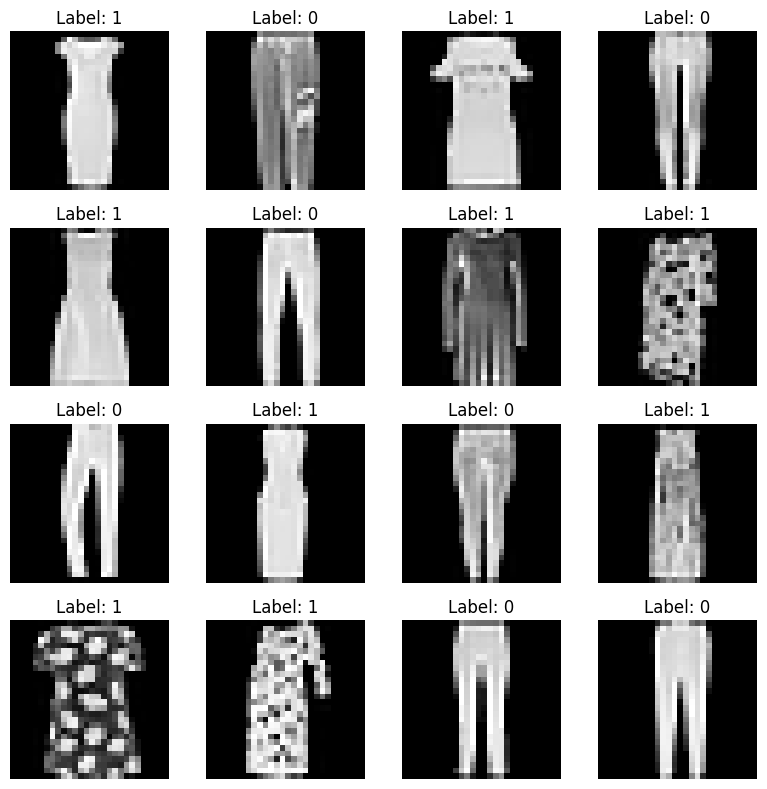

In [40]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
axs = axs.flatten()

for image_index, ax in enumerate(axs):
    image_pixels = eval_df.iloc[image_index].values
    # Reshape the pixel values into a 28x28 image
    image = image_pixels.reshape(28, 28)
    label_image = results_df['label'][image_index]
    
    ax.imshow(image, cmap='gray', extent=[0, 1, 0, 1])
    ax.set_title(f"Label: {label_image}")
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Uložím náš dataset to csv-souboru.

In [41]:
results_df.to_csv('results.csv', index=False)